# Listing 5.6 Setting up data for two-dimensional logistic regression

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.math as math
import matplotlib.pyplot as plt

In [2]:
DTYPE=tf.float64
learning_rate=0.1
training_epochs=2000
momentum=0.0

In [3]:
def sigmoid(x):
    return 1. / (1. + math.exp(-x))

In [4]:
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

$M(x; w) = sig(w_2x_2 + w_1x_1 + w_0)$

# Listing 5.7 Using Tensorflow for multidimensional logistic regression

In [5]:
X1 = tf.constant(x1s, dtype=DTYPE, name='x1')
X2 = tf.constant(x2s, dtype=DTYPE, name='x2')
Y = tf.constant(ys, dtype=DTYPE, name='y')
w = tf.Variable([0., 0., 0.], dtype=DTYPE, name='w')
w

<tf.Variable 'w:0' shape=(3,) dtype=float64, numpy=array([0., 0., 0.])>

In [6]:
y_model = lambda: math.sigmoid(w[2] * X2 + w[1] * X1 + w[0])

In [7]:
cost = lambda: math.reduce_mean(
    -math.log(
        y_model() * Y + (1 - y_model()) * (1 - Y)
    )
)

In [8]:
train_op = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

In [9]:
prev_err = 0
for epoch in range(training_epochs):
    train_op.minimize(cost, w)
    err = cost().numpy()
    print(epoch, err)
    if abs(prev_err - err) < 0.0001:
        break
    prev_err = err
w_val = w.numpy()

0 0.6089871368362756
1 0.6023670309501257
2 0.5974964369150537
3 0.5927571946623857
4 0.58813447015719
5 0.5836237109061161
6 0.5792205595764747
7 0.5749208273049852
8 0.5707204904440628
9 0.5666156870587381
10 0.5626027130566739
11 0.5586780180154602
12 0.5548382007713376
13 0.551080004827255
14 0.547400313631891
15 0.5437961457753089
16 0.5402646501413229
17 0.5368031010514435
18 0.5334088934304768
19 0.530079538019457
20 0.5268126566576066
21 0.5236059776514145
22 0.5204573312456987
23 0.5173646452086436
24 0.5143259405402568
25 0.5113393273114535
26 0.5084030006390147
27 0.5055152367999686
28 0.5026743894874781
29 0.49987888620905563
30 0.49712722482686605
31 0.4944179702389759
32 0.4917497511996587
33 0.48912125727625166
34 0.48653123593955483
35 0.48397848978437097
36 0.48146187387646805
37 0.4789802932220188
38 0.47653270035539824
39 0.47411809304111624
40 0.47173551208559206
41 0.46938403925446154
42 0.46706279529111544
43 0.46477093803220987
44 0.46250766061595266
45 0.4602721

In [10]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(
            - x2_test * w_val[2]
            - x1_test * w_val[1]
            - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

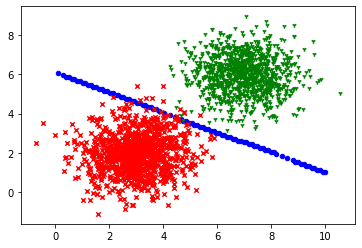

In [11]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()